In [ ]:
!pip install matplotlib

In [2]:
import requests as req
import os, json, re
import matplotlib.pyplot as plt

In [3]:
# 新增資料夾
folderPath = f'./nidss'
if not os.path.exists(folderPath):
    os.makedirs(folderPath)

605
605


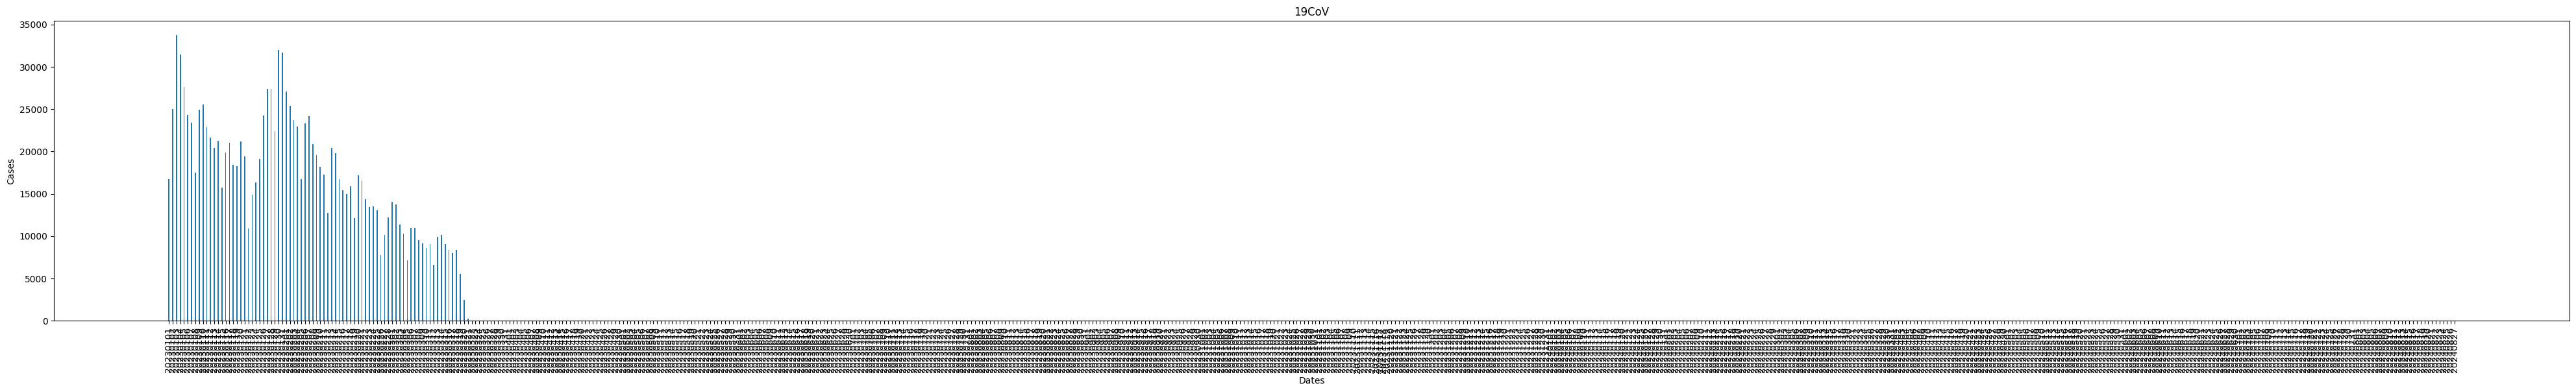

In [8]:
# 發出請求，取得 html
url = "https://nidss.cdc.gov.tw/nndss/disease?id=19CoV"
res = req.get(url=url)

# 放置 json 字串的變數
str_json = ""

# 過濾出來需要的資料
regex = r'hcJson\.push\((.+)\)'
match = re.search(regex, res.text)
if match != None:
    str_json = match[1]

# 儲存 json
with open(f"{folderPath}/nidss.json", "w", encoding="utf8") as file:
    file.write(str_json)


# 將 json 轉成變數
dict_json = json.loads(str_json)

# 取得日期 (可以作為標題)
list_dates = dict_json['xAxis_categories']

# 取得確診數量 (對應 日期)
list_cases = dict_json['series'][0]['data']

# 確認資料數量是否一置
print(len(list_dates))
print(len(list_cases))

# 建立圖表
plt.figure(figsize=(50,6))
plt.bar(list_dates, list_cases, 0.3)
plt.title('19CoV')
plt.xlabel('Dates')
plt.ylabel('Cases')
plt.xticks(rotation=90)
plt.show()